# LIBRERIAS

In [70]:
# Librerias EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# Librerias ML

# PASO 1: Planteamiento del problema y Recopilación de Datos.

-PLANTEAMIENTO DEL PROBLEMA:

- Queremos predecir la prima que deberá asumir el cliente para contratar un seguro médico.


-RECOPILACION DE DATOS:

In [71]:
#Recopilamos datos
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")

#Además, vamos a guardarlo en el repositorio por seguridad.
raw_data_backup = data.to_csv("../data/raw/raw_data.csv", sep=";")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# PASO 2: Exploración y Limpieza de Datos.

- Obtener dimensiones del dataset

In [72]:
#Obtenemos dimensiones del dataset
data.shape

(1338, 7)

- Obtener informacion sobre tipos de datos y valores nulos.

In [73]:
#Obtenemos informacion sobre los tipos de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
#Obtenemos info sobre valores nulos

data.isna().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-CONCLUSIONES:

- Dimensiones: 1338, 7
- Valores nulos: Sin valores nulos.
- Tipo de datos: 4 campos numéricos y 3 campos categoricos.

- Eliminacion de Duplicados

In [75]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.
#id = "id" En este caso no es necesario porque no hay un identificador en el dataset

def EraseDuplicates(dataset):
    older_shape = dataset.shape
    if (dataset.duplicated().sum()):
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
        print ("Erase duplicates...")
        dataset.drop_duplicates(inplace = True)
    else:
        print ("No coincidences.")
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

EraseDuplicates(data)

data

Total number of duplicates 1
Erase duplicates...
The older dimension of dataset is (1338, 7), and the new dimension is (1337, 7).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- Eliminacion de datos irrelevantes.

In [76]:
#Funcion para eliminar datos irrelevantes.

#irrelevant_lst = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

#EraseIrrelevants(data, irrelevant_lst)

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


-CRITERIOS DE ELIMINACION

- En este caso considero todos los predictores lo suficientemente relacionados con el target como para eliminarlos.

# PASO 3: Analisis de variables univariantes

- Analisis sobre variables categóricas

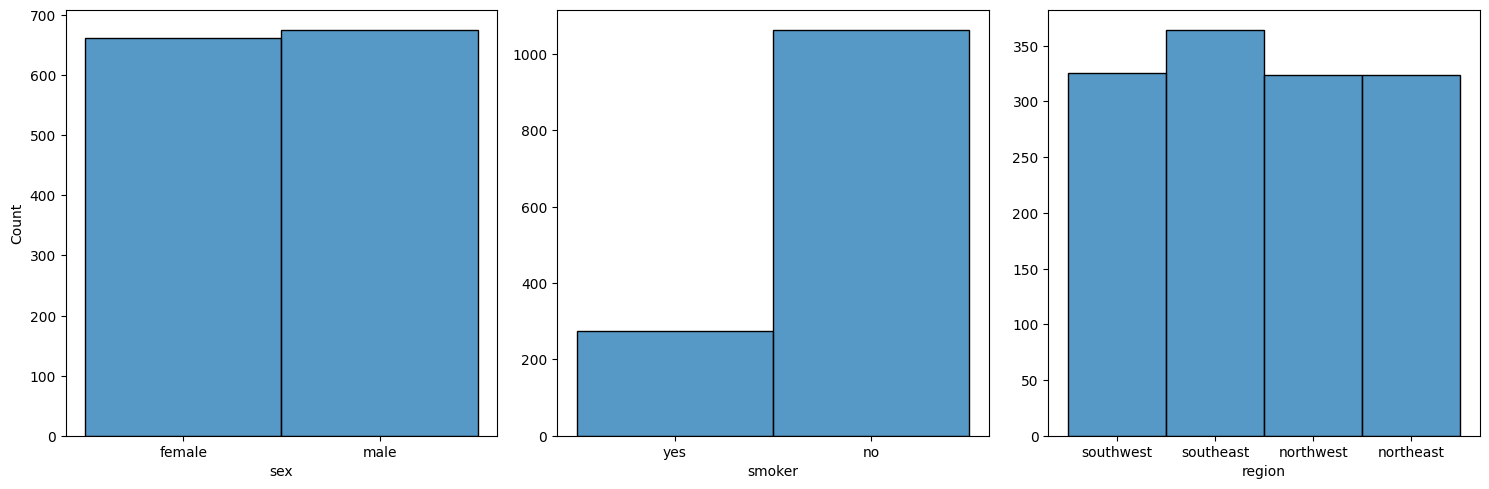

In [77]:
# Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 3, figsize=(15,5))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0], data = dataset, x = "sex")
    sns.histplot( ax = axis[1], data = dataset, x = "smoker").set(ylabel = None)
    sns.histplot( ax = axis[2], data = dataset, x = "region").set(ylabel = None)
   

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

-CONCLUSIONES:

- Sex: Hay un numero similar de mujeres y hombres.
. Smoker: La mayoría de la muestra es no fumadora.
- Region: Aunque hay un pequeño despunte en la muestra a favor de la región del sudeste la cantidad de muestra con las demás regiones es muy similar.

- Analisis sobre variables numéricas

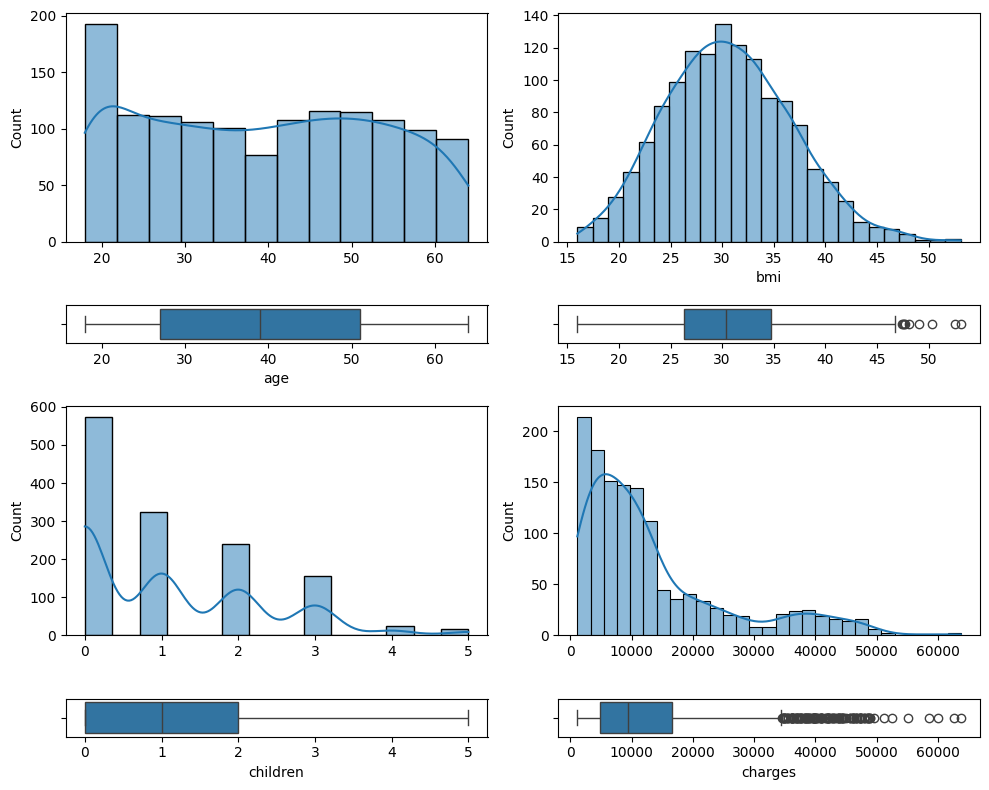

In [78]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 2, figsize=(10,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset, x = "age", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[1,0], data = dataset, x = "age")
    sns.histplot( ax = axis[0,1], data = dataset, x = "bmi", kde = True)
    sns.boxplot( ax = axis[1,1], data = dataset, x = "bmi").set(xlabel = None)
    sns.histplot( ax = axis[2,0], data = dataset, x = "children", kde = True).set(xlabel = None)
    sns.boxplot ( ax = axis[3,0], data = dataset, x = "children")
    sns.histplot ( ax = axis[2,1], data = dataset, x = "charges", kde = True).set(xlabel = None)
    sns.boxplot ( ax = axis[3,1], data = dataset, x = "charges")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

-CONCLUSIONES

- Age: La media de edad es de 38 años.

- BMI: El Indice de Masas Corporal media es de 31, es decir, obesidad de tipo 1.

- Children: La mayoría de la muestra no tiene hijos.

- Charges: Es la Target, la media es de 9500.

# PASO 4: Analisis de variable multivariante

- Analisis Charges (age - bmi - children) numérico/numérico

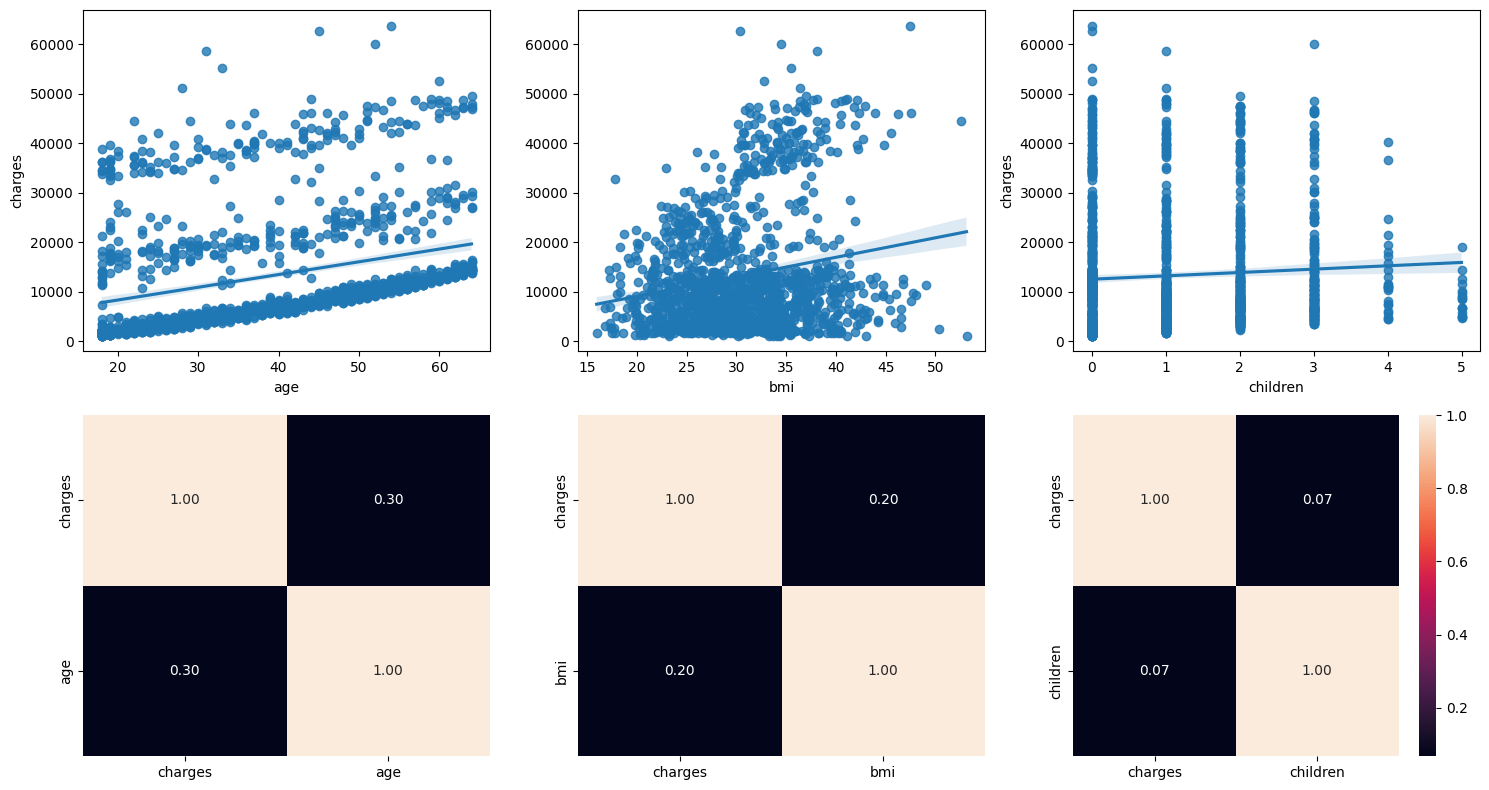

<Figure size 640x480 with 0 Axes>

In [79]:
#Analisis numerico/numerico

def NumNumAnalysi(dataset, y, x_list):
    #Creamos la figura
    fig, axis = plt.subplots(2, 3, figsize=(15,8))

    #Creamos la grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = x_list[0], y = y)
    sns.heatmap( data[[y,x_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0], cbar=False)
    sns.regplot ( ax = axis[0,1], data = dataset, x = x_list[1], y = y).set(ylabel = None)
    sns.heatmap( data[[y, x_list[1]]].corr(), annot=True, fmt = ".2f", ax = axis[1,1], cbar=False)
    sns.regplot( ax = axis[0,2], data = dataset, x = x_list[2], y = y)
    sns.heatmap( data[[y, x_list[2]]].corr(), annot=True, fmt = ".2f", ax = axis[1,2])

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, "charges", ["age", "bmi", "children"])

##### CONCLUSIONES:

- Charges/Age: Son los datos más correlacionados. Contra más años tiene más prima tiene que pagar.

- Charges/BMI: También tiene una correlacion significante, a mayor IMC más tiene que pagar.

- Charges/Children: Aunque hay una correlación menor a más hijos más tiene que pagar el cliente.

##### Analisis Categórico/Categórico

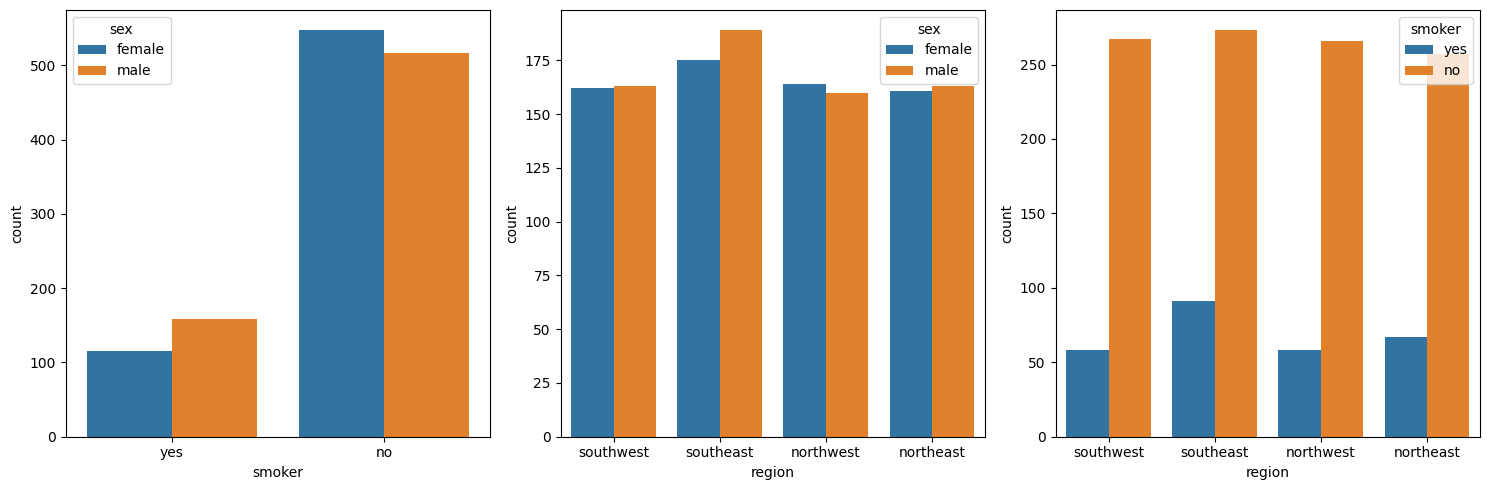

In [80]:
#Analisis categorico/categorico

def CatCatAnalysi(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 3, figsize=(15,5))

    #Creamos las graficas.
    sns.countplot(ax = axis[0], data = dataset, x = "smoker", hue = "sex")
    sns.countplot(ax = axis[1], data = dataset, x = "region", hue="sex")
    sns.countplot(ax = axis[2], data = dataset, x = "region", hue="smoker")


    plt.tight_layout()
    plt.show()

CatCatAnalysi(data)

##### CONCLUSIONES:

- Smoker: La mayoría de fumadores son hombres.

- Region: En el sudeste hay más hombres que mujeres y, de hecho, es la region donde más se fuma.

- Por los datos que estamos viendo hasta ahora parece que los hombres van a pagar más prima que las mujeres, vamos a comprobarlo.

##### Combinación Target / Predictors

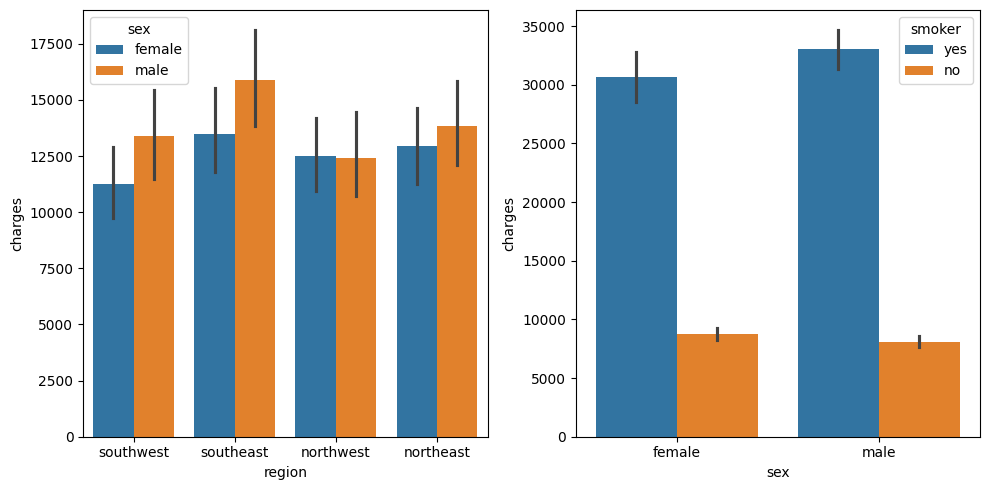

In [81]:
#Combinación Target/Pred

def CombTargPred(dataset):
    
    fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

    sns.barplot(ax = axis[0], data = dataset, x = "region", y = "charges", hue = "sex")
    sns.barplot(ax = axis[1], data = dataset, x = "sex", y = "charges", hue = "smoker")

    plt.tight_layout()
    plt.show()

CombTargPred(data)

#### CONCLUSIONES:

- En efecto ser los hombres en el sudeste son los que más pagan, y los fumadores pagan mucho más que los no fumadores.

- Codificamos las variables categoricas

In [82]:
#Convertimos las columnas categoricas al Dtype category para optimizar los datos.

def ObjectToCategory(dataset, col):
    dataset[col] = dataset[col].astype("category")
    return dataset


ObjectToCategory(data, "sex")
ObjectToCategory(data, "smoker")
ObjectToCategory(data, "region")


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [ ]:
#Vamos a factorizar las variables categoricas -esta vez sin OHE.-

def Factorized(dataset, col):

    factorize = pd.factorize(dataset[col])
    parsin_dic = {}
    index = factorize[1]
    factor = list(set(factorize[0]))
    for i in range (len(factorize[1])):
        parsin_dic.update({index[i] : int(factor[i])})
    
    with open (f"../data/interim/{col}_parsing.json", "w") as j:
        json.dump(parsin_dic, j)
    
    dataset[col] = factorize[0]
    
    return dataset

#Factorized(data, "sex")
#Factorized(data, "smoker")
#Factorized(data, "region")


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


### Creamos la tabla de correlaciones

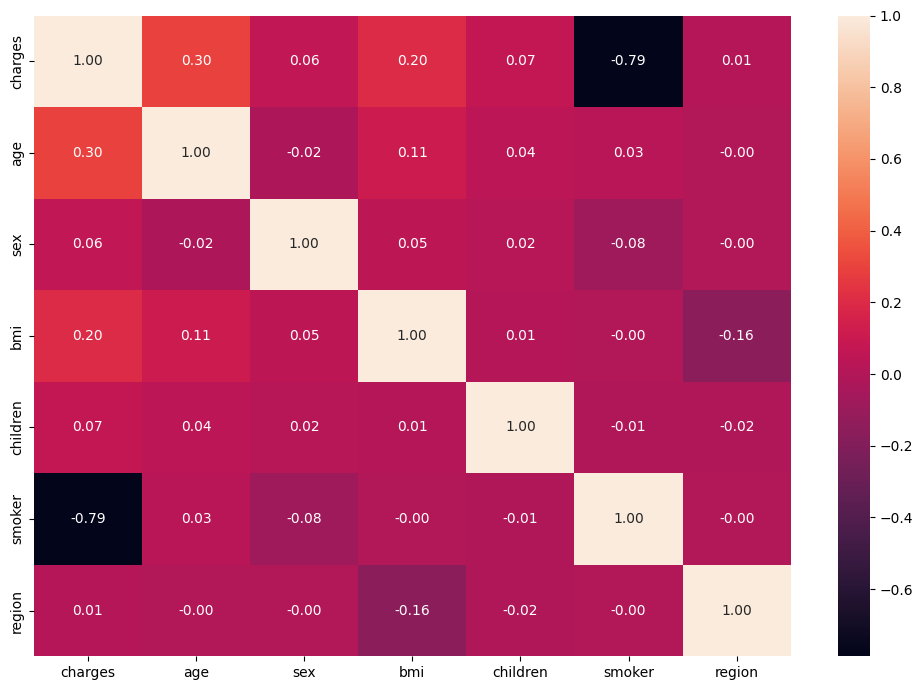

In [101]:
#Tabla de correlaciones
fig, axis = plt.subplots(figsize=(10,7))

sns.heatmap(data[["charges", "age", "sex", "bmi", "children", "smoker", "region"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

##### PRIMERAS CONCLUSIONES:

- La prima esta fuertemente relacionada con el predictor fumador.

- También está relacionada con el BMI y la edad.

- Hay cierta relacion del BMI con la region.